In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [21]:
mps = {}

mps['WA'] = {
    "Jo Vallentine": np.arange(1990, 1992),
    "Christabel Chamarette": np.arange(1992, 1996),
    "Dee Margetts": np.arange(1993, 1999),
    "Rachel Siewert": np.arange(2005, 2021),
    "Scott Ludlam": np.arange(2008, 2017),
    "Jordan Steele-John": np.arange(2017, 2025),
    "Dorinda Cox": np.arange(2021, 2025),
}

mps['TAS'] = {
    "Bob Brown": np.arange(1996, 2012),
    "Christine Milne": np.arange(2005, 2015),
    "Nick McKim": np.arange(2015, 2025),
    "Peter Whish-Wilson": np.arange(2012, 2025),
}

mps['NSW'] = {
    "Michael Organ": np.arange(2002, 2004),
    "Kerry Nettle": np.arange(2002, 2008),
    "Lee Rhiannon": np.arange(2011, 2018),
    "Mehreen Faruqi": np.arange(2018, 2025),
    "David Shoebridge": np.arange(2022, 2025),
}

mps['SA'] = {
    "Sarah Hanson-Young": np.arange(2008, 2025),
    "Penny Wright": np.arange(2011, 2015),
    "Robert Simms": np.arange(2015, 2016),
    "Barbara Pocock": np.arange(2022, 2025),
}

mps['VIC'] = {
    "Adam Bandt": np.arange(2010, 2025),
    "Richard Di Natale": np.arange(2011, 2020),
    "Janet Rice": np.arange(2014, 2024),
    "Lidia Thorpe": np.arange(2020, 2023),
    "Steph Hodgins-May": np.arange(2024, 2025),
}

mps['QLD'] = {
    "Larissa Waters (term 1)": np.arange(2011, 2017),
    "Larissa Waters (term 2)": np.arange(2018, 2025),
    "Andrew Bartlett": np.arange(2017, 2018),
    "Penny Allman-Payne": np.arange(2022, 2025),
    "Max Chandler-Mather": np.arange(2022, 2025),
    "Elizabeth Watson-Brown": np.arange(2022, 2025),
    "Stephen Bates": np.arange(2022, 2025)
}

In [22]:
mp_count_dict = {'year': np.arange(1987, 2025)}
for state, mp_dict in mps.items():
    years = np.concatenate(list(mp_dict.values()))
    counts, lower_bin_bounds = np.histogram(years, bins=np.arange(1986.5, 2025.5))
    mp_count_dict[state] = counts

In [23]:
df_mps = pd.DataFrame(mp_count_dict)
df_mps = df_mps.set_index('year')
order = ['WA', 'TAS', 'NSW', 'SA', 'VIC', 'QLD']
df_mps = df_mps[order]
df_mps

,WA,TAS,NSW,SA,VIC,QLD
year,,,,,,
1987,0,0,0,0,0,0
1988,0,0,0,0,0,0
1989,0,0,0,0,0,0
1990,1,0,0,0,0,0
1991,1,0,0,0,0,0
1992,1,0,0,0,0,0
1993,2,0,0,0,0,0
1994,2,0,0,0,0,0
1995,2,0,0,0,0,0


In [69]:
#df_mps.plot(kind='bar', stacked=True, figsize=(11,6), width=1)
#plt.title("Australian Greens MPs in Federal Parliament")
#plt.ylabel("Number of MPs at year end")
#plt.savefig('federal_mps.png', dpi=300, facecolor='white', bbox_inches='tight')

In [25]:
national_senate_vote = {
    'year': np.array([1993, 1996, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022]),
    'vote': np.array([2.95, 3.17, 2.72, 4.94, 7.67, 9.04, 13.11, 8.65, 8.65, 10.19, 12.66])
}

In [28]:
df_vote = pd.DataFrame(national_senate_vote)
df_vote = df_vote.set_index('year')

In [29]:
df_vote

,vote
year,
1993,2.95
1996,3.17
1998,2.72
2001,4.94
2004,7.67
2007,9.04
2010,13.11
2013,8.65
2016,8.65


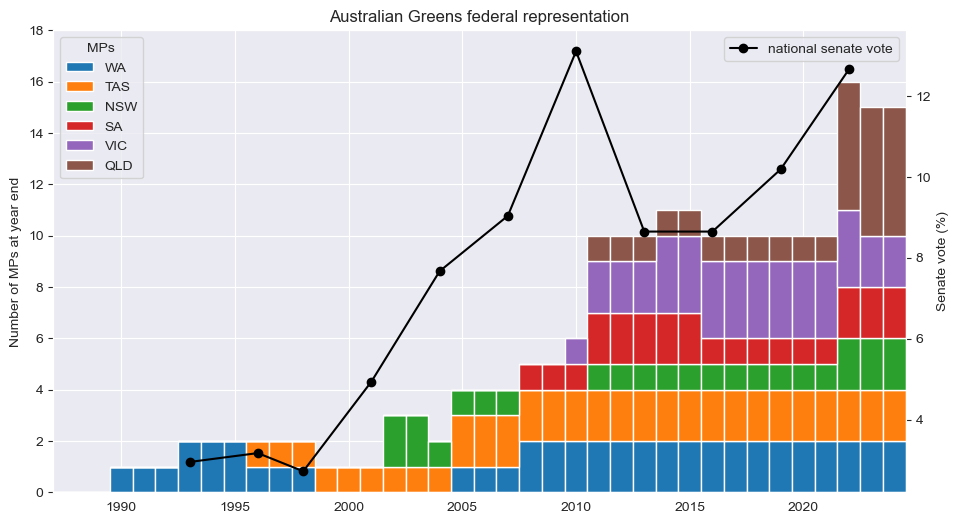

In [70]:
fig, ax = plt.subplots(figsize=(11,6))
ax2 = ax.twinx()

plt.title("Australian Greens federal representation")

bottom = np.zeros(len(df_mps))
for state in order:
    ax.bar(df_mps.index, df_mps[state], 1, label=state, bottom=bottom)
    bottom += df_mps[state]
ax2.plot(df_vote.index, df_vote['vote'], color='black', marker='o', label='national senate vote')

ax.set_ylabel("Number of MPs at year end")
ax2.set_ylabel("Senate vote (%)")

ax.legend(title='MPs')
ax2.legend()

ax.set_xlim(1987,2024.5)
ax.set_ylim(0, 18)

#ax.grid(False)
ax2.grid(False)

plt.savefig('federal_mps.png', dpi=300, facecolor='white', bbox_inches='tight')